# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [204]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [205]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   

# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [208]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = ["blue","red","green","cyan","magenta","yellow","black","grey","darkviolet","darkred","lime"]  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            #plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



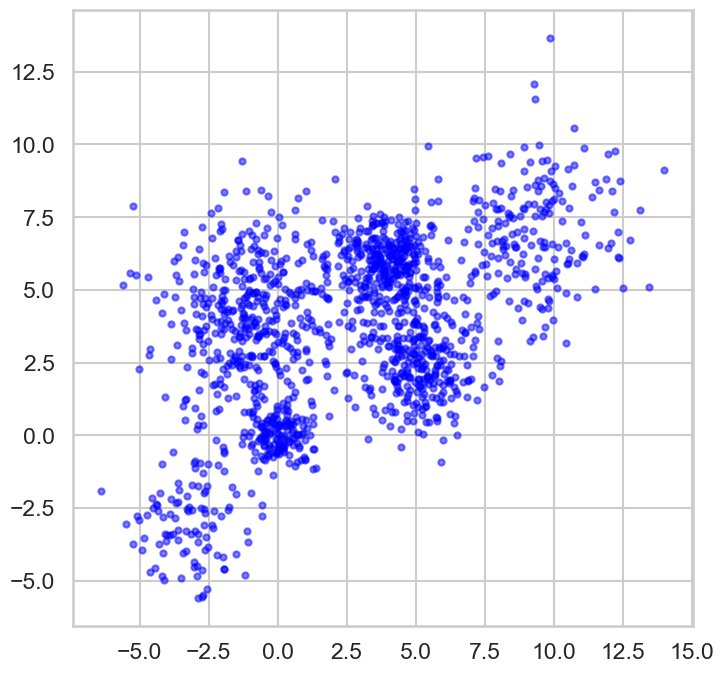

In [209]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

<AxesSubplot:xlabel='K'>

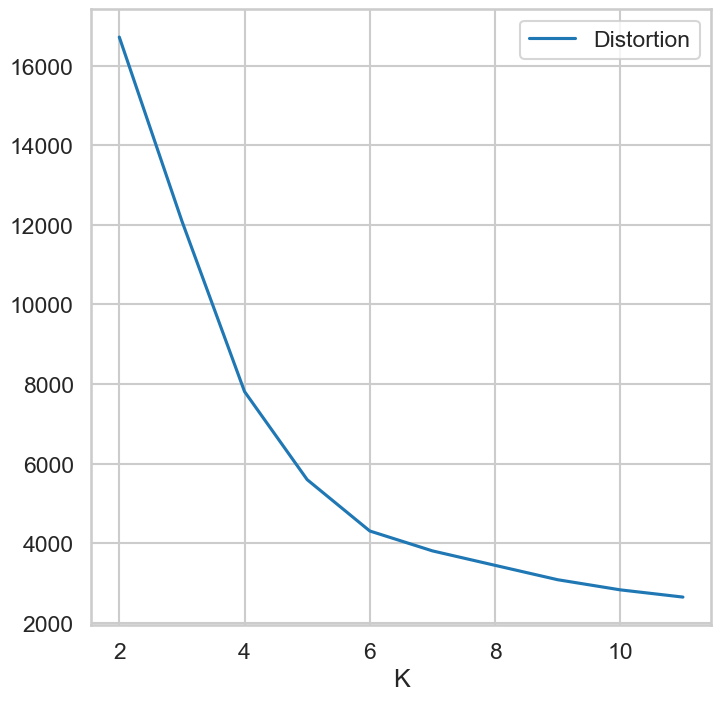

In [210]:
dist = []
K = range(2,12)
for i in K:
    kmeans = KMeans(n_clusters=i).fit(Multi_blob_Data)
    dist.append(kmeans.inertia_)
data = {"K": K,"Distortion": dist}
df = pd.DataFrame(data)
df.set_index("K")
df.plot(x="K",y="Distortion") #elbow at K=6


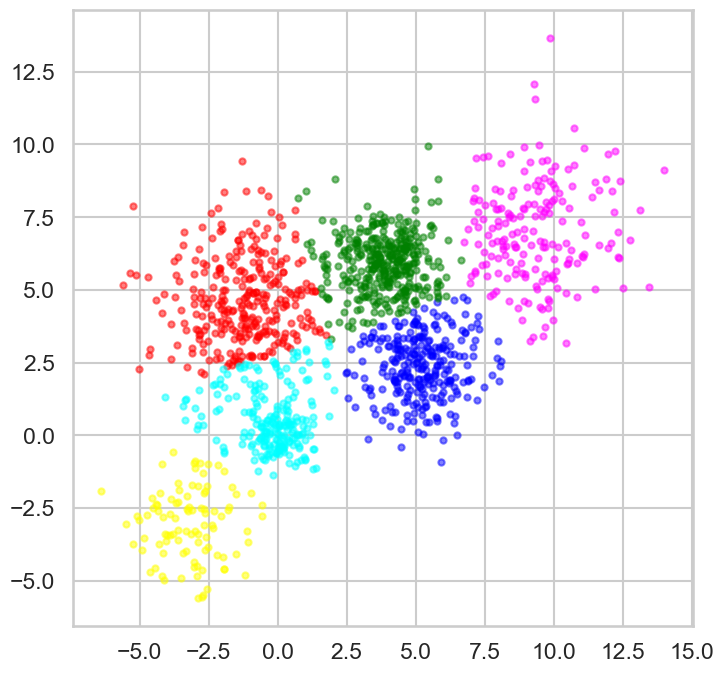

In [211]:
#plotting K-Means with K=6
kmeans = KMeans(n_clusters=6).fit(Multi_blob_Data)
labels = kmeans.labels_

display_cluster(Multi_blob_Data,km=kmeans,num_clusters=6)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [212]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



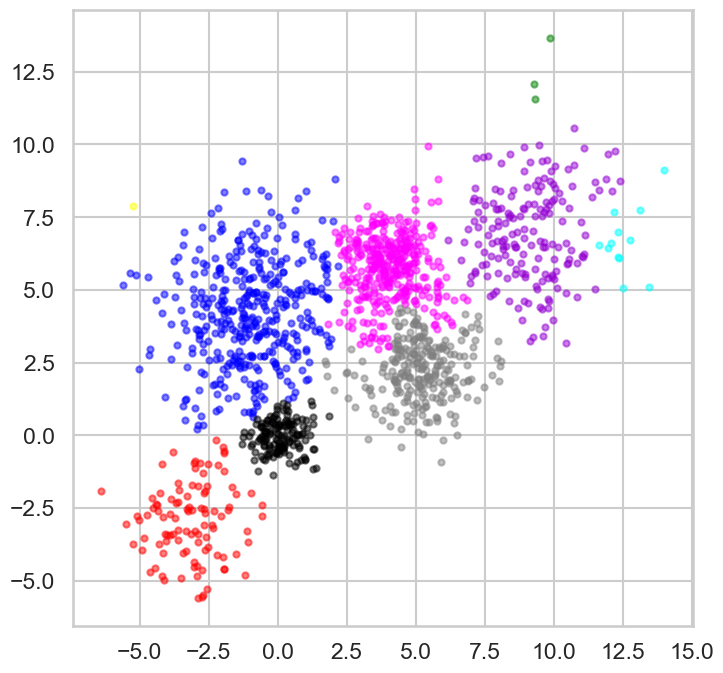

In [332]:

# max_sil=[0,"","",0.0]
# for aff in ["euclidean","manhattan","cosine"]:
#     for link in ["average","single"]:
#         for thresh in range(1,100):
#             thr=thresh/10
#             hierarchical = AgglomerativeClustering(affinity=aff,linkage=link,distance_threshold=thr,n_clusters=None).fit(Multi_blob_Data)
#             if(np.max(hierarchical.labels_)+1>2):
#                 sil = silhouette_score(Multi_blob_Data,labels=hierarchical.labels_)
#                 if(sil>max_sil[0]):
#                      max_sil=[sil,aff,link,thr]
# print(max_sil)

hierarchical = AgglomerativeClustering(affinity="euclidean",linkage="average",distance_threshold=5.8,n_clusters=None).fit(Multi_blob_Data)
# plot_dendrogram(hierarchical)
# u_labels=np.unique(hierarchical.labels_)
# u_labels
display_cluster(Multi_blob_Data,km=hierarchical,num_clusters=11)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

[-1  0  1  2  3]


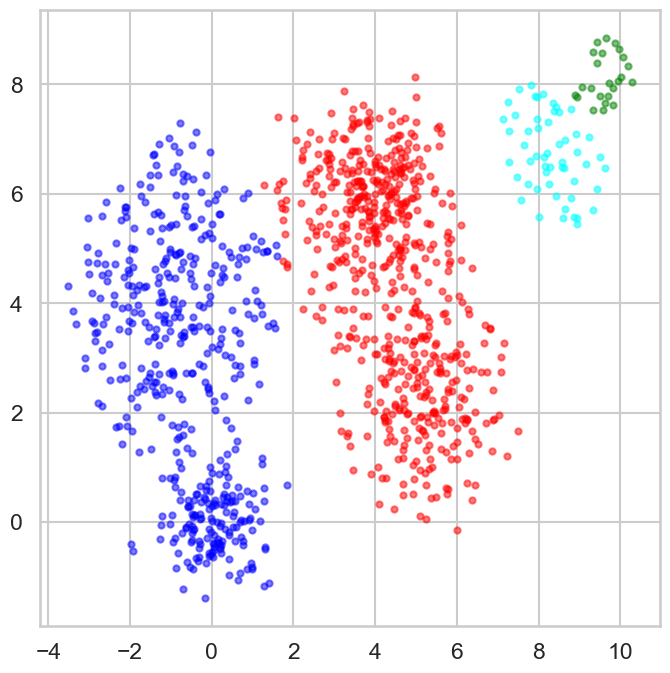

In [324]:
# max_sil = [0.0,0.0,0]
# for inti in range(2,60,1):
#     for j in range(5,25):
#         i=inti/20
#         dbscan = DBSCAN(eps=i,min_samples=j).fit(Multi_blob_Data)
#         myK = np.max(dbscan.labels_)+1
#         if(myK>3):
#             sil = silhouette_score(Multi_blob_Data,labels=dbscan.labels_)
#             if(sil>max_sil[0]):
#                 max_sil=[sil,i,j]
# print(max_sil)

dbscan = DBSCAN(eps=0.85,min_samples=24).fit(Multi_blob_Data)
u_labels=np.unique(dbscan.labels_)
print(u_labels)
display_cluster(Multi_blob_Data,km=dbscan,num_clusters=11)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [214]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 